# Case Descriptions

## ROCOF based methods

0.4 pu load ramping on Bus 12 in Area 1

 - _Case 1_: No inertia emulation at all
 - _Case 2_: Power Sharing between areas (VSC 1 and 2 local inertia emulation enabled, VSC 2 dc droop enabled)
 - _Case 3_: WTG inertia response (VSC 1 inertia emulation, WTGs IE enabled)
 - _Case 4_: Area power sharing with WTG inertial response (VSC 1 and 2 inertia emulation enabled. Observe inadequate responses from WTGs)
 - _Case 5_: Adequate inertial response from WTGs (additional frequency information from grid areas)

Load Ramping in Area 1

In [1]:
with  open('case1.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, 0
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 0
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 0

ALTER, WTG4DC, REP, WTG4 1, Kdc, 0
ALTER, WTG4DC, REP, WTG4 2, Kdc, 0
""")

with  open('case2.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 50
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 10

ALTER, WTG4DC, REP, WTG4 1, Kdc, 0
ALTER, WTG4DC, REP, WTG4 2, Kdc, 0
""")

with  open('case3.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm

ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 0
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 0

ALTER, WTG4DC, REP, WTG4 1, Kdc, 10
ALTER, WTG4DC, REP, WTG4 2, Kdc, 10
""")

with  open('case4.dm', 'w') as fid:
    fid.write("""# DOME format 1.0
INCLUDE, ieee28.dm


ALTER, VSC1_IE2, REP, VSC 1, Ki, -50
ALTER, VSC1_IE2, REP, VSC 1, Kdc, 0

ALTER, VSC1_IE2, REP, VSC 2, Ki, 50
ALTER, VSC1_IE2, REP, VSC 2, Kdc, 10

ALTER, WTG4DC, REP, WTG4 1, Kdc, 10
ALTER, WTG4DC, REP, WTG4 2, Kdc, 10
""")

Parsing input file case1.dm.
Case file case1.dm parsed in 0.0157 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0087 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0179 second
Dynamic models initialized in 0.0069 second.
Powerflow report written to <case1_out.txt> in 0.0039 second.

Eigenvalue Analysis:
Report saved.
System is small-signal stable in the initial neighbourhood.


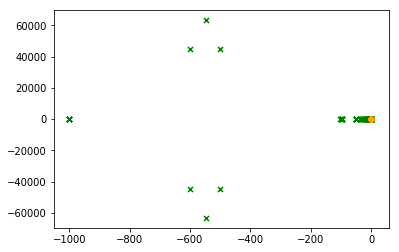

Analysis finished in 0.3669 second.
Parsing input file case2.dm.
Case file case2.dm parsed in 0.0165 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0132 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0191 second
Dynamic models initialized in 0.0049 second.
Powerflow report written to <case2_out.txt> in 0.0067 second.

Eigenvalue Analysis:
Report saved.
System is small-signal stable in the initial neighbourhood.


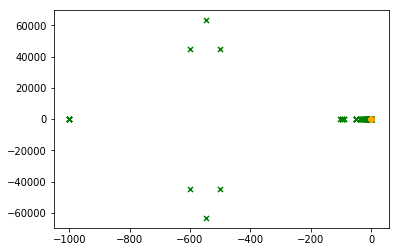

Analysis finished in 0.3961 second.
Parsing input file case3.dm.
Case file case3.dm parsed in 0.0152 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0054 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0264 second
Dynamic models initialized in 0.0040 second.
Powerflow report written to <case3_out.txt> in 0.0048 second.

Eigenvalue Analysis:
Report saved.
System is small-signal stable in the initial neighbourhood.


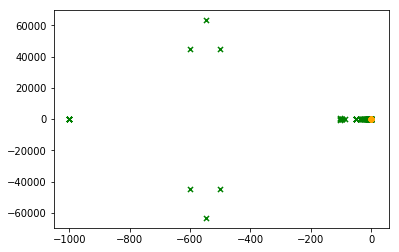

Analysis finished in 0.3720 second.
Parsing input file case4.dm.
Case file case4.dm parsed in 0.0120 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0066 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0277 second
Dynamic models initialized in 0.0055 second.
Powerflow report written to <case4_out.txt> in 0.0049 second.

Eigenvalue Analysis:
Report saved.
System is small-signal stable in the initial neighbourhood.


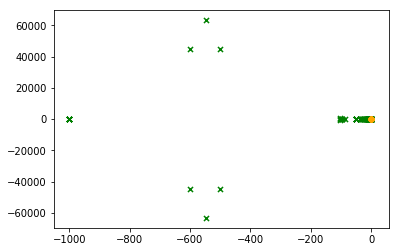

Analysis finished in 0.3215 second.
Parsing input file case1.dm.
Case file case1.dm parsed in 0.0112 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0026 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0187 second
Dynamic models initialized in 0.0163 second.
Powerflow report written to <case1_out.txt> in 0.0158 second.

Time Domain Simulation:
Integration Method: Implicit Trapezoidal
Simulation time: 20
 (0%) Time = 0.0333s, step = 1, niter = 1
 (5%) Time = 1.0333s, step = 31, niter = 1
Load on Bus 12 ramped up by 0.4 pu at t = 2
 (10%) Time = 2.0317s, step = 61, niter = 3
 (15%) Time = 3.0317s, step = 91, niter = 3
 (20%) Time = 4.0317s, step = 121, niter = 3
 (25%) Time = 5.0317s, step = 151, ni

In [2]:
# tds = {
#     'case': os.path.abspath('./case1.dm'),
#     'pert': 'load12_ramp.py',
#     }

%matplotlib inline

import os

from matplotlib import pyplot

from andes.main import run
from andes.plot import main as andesplot
from andes.plot import read_dat, read_label, do_plot, add_plot

run(routine='s', case='case1.dm', pert='load12_ramp.py')
run(routine='s', case='case2.dm', pert='load12_ramp.py')
run(routine='s', case='case3.dm', pert='load12_ramp.py')
run(routine='s', case='case4.dm', pert='load12_ramp.py')

run(routine='t', case='case1.dm', pert='load12_ramp.py')

In [3]:
run(routine='t', case='case2.dm', pert='load12_ramp.py')

Parsing input file case2.dm.
Case file case2.dm parsed in 0.0213 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0042 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0212 second
Dynamic models initialized in 0.0056 second.
Powerflow report written to <case2_out.txt> in 0.0051 second.

Time Domain Simulation:
Integration Method: Implicit Trapezoidal
Simulation time: 20
 (0%) Time = 0.0333s, step = 1, niter = 1
 (5%) Time = 1.0333s, step = 31, niter = 1
Load on Bus 12 ramped up by 0.4 pu at t = 2
 (10%) Time = 2.0317s, step = 61, niter = 3
 (15%) Time = 3.0317s, step = 91, niter = 3
 (20%) Time = 4.0317s, step = 121, niter = 3
 (25%) Time = 5.0317s, step = 151, niter = 3
 (30%) Time = 6.0317s, step 

In [4]:
run(routine='t', case='case3.dm', pert='load12_ramp.py')

Parsing input file case3.dm.
Case file case3.dm parsed in 0.0177 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0115 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0286 second
Dynamic models initialized in 0.0056 second.
Powerflow report written to <case3_out.txt> in 0.0067 second.

Time Domain Simulation:
Integration Method: Implicit Trapezoidal
Simulation time: 20
 (0%) Time = 0.0333s, step = 1, niter = 1
 (5%) Time = 1.0333s, step = 31, niter = 1
Load on Bus 12 ramped up by 0.4 pu at t = 2
 (10%) Time = 2.0317s, step = 61, niter = 3
 (15%) Time = 3.0204s, step = 103, niter = 7
 (20%) Time = 4.0214s, step = 216, niter = 6
 (25%) Time = 5.0310s, step = 329, niter = 7
 (30%) Time = 6.0287s, step

In [5]:
run(routine='t', case='case4.dm', pert='load12_ramp.py')

Parsing input file case4.dm.
Case file case4.dm parsed in 0.0380 second.
System contains 2 islands and 0 islanded buses.
Each island has a slack bus correctly defined.
Power flow initialized in 0.0080 second.

Power Flow Analysis:
Sparse Solver: KLU
Solution Method: NR
Flat-start: No

 Iter  1.  Max. Mismatch = 1.4701436
 Iter  2.  Max. Mismatch = 0.3985662
 Iter  3.  Max. Mismatch = 0.0009131
 Iter  4.  Max. Mismatch = 0.0000008
Power flow converged in 0.0193 second
Dynamic models initialized in 0.0038 second.
Powerflow report written to <case4_out.txt> in 0.0044 second.

Time Domain Simulation:
Integration Method: Implicit Trapezoidal
Simulation time: 20
 (0%) Time = 0.0333s, step = 1, niter = 1
 (5%) Time = 1.0333s, step = 31, niter = 1
Load on Bus 12 ramped up by 0.4 pu at t = 2
 (10%) Time = 2.0317s, step = 61, niter = 3
 (15%) Time = 3.0343s, step = 100, niter = 7
 (20%) Time = 4.0244s, step = 175, niter = 7
 (25%) Time = 5.0358s, step = 237, niter = 6
 (30%) Time = 6.0213s, step